# Quantlib - Tutorial

In [119]:
from src import quantlib as ql

import pandas as pd
import matplotlib.pyplot as plt

In [120]:
%load_ext autoreload
%autoreload 2
#%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Loading financial time series 

In [77]:
tickers   = ["MSFT","AAPL","AMZN","GOOG","KO","GE","IBM"]
startdate = "2011-12-31" 
enddate   = "2022-12-31" 

In [78]:
assets = ql.getassets(tickers, startdate=startdate, enddate=enddate, datatype="Adj Close")
assets

,AAPL,AMZN,GE,GOOG,IBM,KO,MSFT
Date,,,,,,,
2012-01-03,12.500193,8.951500,86.231949,16.573130,117.096092,24.902029,21.413073
2012-01-04,12.567369,8.875500,87.171303,16.644611,116.618370,24.745806,21.916996
2012-01-05,12.706894,8.880500,87.124313,16.413727,116.065262,24.628647,22.140968
2012-01-06,12.839730,9.130500,87.594002,16.189817,114.732765,24.472431,22.484921
2012-01-09,12.819360,8.928000,88.580307,15.503389,114.135674,24.472431,22.188961
...,...,...,...,...,...,...,...
2022-12-23,131.658981,85.250000,63.848557,89.809998,139.931198,63.820000,238.133545
2022-12-27,129.831772,83.040001,64.668228,87.930000,140.691849,64.209999,236.367981
2022-12-28,125.847855,81.820000,63.989071,86.459999,138.320984,63.570000,233.944031


In [79]:
rets = ql.compute_returns(assets, mpor=1, ascending=True, dropna=True)
rets

,AAPL,AMZN,GE,GOOG,IBM,KO,MSFT
Date,,,,,,,
2012-01-04,0.005374,-0.008490,0.010893,0.004313,-0.004080,-0.006274,0.023533
2012-01-05,0.011102,0.000563,-0.000539,-0.013871,-0.004743,-0.004734,0.010219
2012-01-06,0.010454,0.028152,0.005391,-0.013642,-0.011481,-0.006343,0.015535
2012-01-09,-0.001587,-0.022178,0.011260,-0.042399,-0.005204,0.000000,-0.013163
2012-01-10,0.003581,0.004368,-0.007423,0.001092,-0.001542,0.005948,0.003605
...,...,...,...,...,...,...,...
2022-12-23,-0.002798,0.017425,0.000245,0.017562,0.005466,0.007578,0.002267
2022-12-27,-0.013878,-0.025924,0.012838,-0.020933,0.005436,0.006111,-0.007414
2022-12-28,-0.030685,-0.014692,-0.010502,-0.016718,-0.016851,-0.009967,-0.010255


In [35]:
#qt.compound(rets)

In [36]:
#qt.compound_returns(rets)

In [37]:
#qt.compute_logreturns(assets, mpor=5, ascending=True, dropna=True)

In [38]:
#qt.drawdown(assets, rets=False, maxd=True, percent=True)#.plot()

In [30]:
#qt.drawdown(assets, rets=False, maxd=True, percent=True)

In [31]:
#qt.drawdown(rets, rets=True, maxd=False, percent=True).plot()

In [32]:
#qt.drawdown(rets, rets=True, maxd=True, percent=True)

In [33]:
#qt.drawup(assets).plot()

In [34]:
#qt.is_normal(rets, siglev=0.05)

In [35]:
#qt.semistd(rets, negative=False)

In [36]:
#qt.annualize_returns(rets, ppy=252)

In [37]:
#qt.annualize_std(rets, ppy=252)

#### Value-at-Risk estimators
Can be run on both pd.Series or pd.DataFrames.

Let *CL* be a Confidence Level. The (1-CL)% Value-at-Risk-based estimator is computed.

In [106]:
# Confidence level
CL = 99/100

**Value-at-Risk**: .var

Returns the (1-CL)% VaR figure corresponding to the input Confidence Level (i.e., the (1-CL) quantile).\
It uses pd.quantile method, interpolation is used by default.

In [107]:
# pd.Series or single column pd.DataFrame
s = rets[["AAPL"]] # or rets["AAPL"]
ql.var(s, CL=CL)

AAPL   -0.048387
dtype: float64

In [108]:
# pd.DataFreme
ql.var(rets, CL=CL)

AAPL   -0.048387
AMZN   -0.056431
GE     -0.059087
GOOG   -0.047631
IBM    -0.043399
KO     -0.031608
MSFT   -0.042652
dtype: float64

**Value-at-Risk under Normal distribution**: .var_normal

Returns the VaR figure corresponding to the input Confidence Level by assuming normality of 
the return series.

Let $\mu$ and $\sigma$ be the mean and the volatility of the returns $R$ 
and assume that $R\sim N(\mu,\sigma)$. 
If $X\sim N(0,1)$, then $R = \mu + X \sigma$.
In this way, for computing the (1-CL)-quantile of $R$, it is suffices to compute 
the (1-CL)-quantile of the stardard normal distribution. 

By definition, the (1-CL)-quantile is the number $z_{CL}$ such that 
$\mathbb{P}(R \leq z_{CL}) = 1-CL$.
Hence: 

$$
1-CL 
= \mathbb{P}(R \leq z_{CL}) 
= \mathbb{P}(\mu+ X\sigma \leq z_{CL}) 
= \mathbb{P}\left(X \leq \frac{z_{CL}-\mu}{\sigma}\right) 
= \Phi\left( \frac{z_{CL}-\mu}{\sigma} \right)
\qquad\Longrightarrow\qquad
z_{CL} = \mu + \Phi^{-1}(1-{CL})\sigma 
$$
where $\Phi^{-1}(1-{CL})$ is the (1-CL)-quantile of the standard normal distribution.

In [109]:
ql.var_normal(rets, CL=CL)

AAPL   -0.041640
AMZN   -0.046651
GE     -0.047442
GOOG   -0.038453
IBM    -0.033415
KO     -0.025581
MSFT   -0.037870
dtype: float64

**Value-at-Risk Cornish-Fisher method**: .var_normal(cl=True)

This is a modifed version of the parametric normal method for quantile computation (semi-parametric method).
The method relates quantilies of **non Gaussian** distribution with the quantiles of the Gaussian as follows: 
$$
\tilde{z}_{CL} 
= z_{CL} + \frac{1}{6}(z_{CL}^2 - 1)S 
+ \frac{1}{24}(z_{CL}^3 - 3 z_{CL})(K-3) 
- \frac{1}{36}(2z_{CL}^3 - 5 z_{CL})S^2
$$
where $\tilde{z}_{CL}$, $S$, and $K$ denote the (1-CL)-quantile, 
the skewness, and the kurtosis of the non-Gaussian distribution 
(say, our returns series), respectively, 
and $z_{CL}$ is the (1-CL)-quantile of the standard normal distribution. 
If the input return distribution is, indeed, normal, 
then $S=0$ and $K=3$ and so $\tilde{z}_{CL}$ would be equal to $z_{CL}$.

Then, the VaR in this case will be equalt to $\mu + \tilde{z}_{CL}\sigma$.

In [110]:
ql.var_normal(rets, CL=CL, cf=True)

AAPL   -0.066104
AMZN   -0.075270
GE     -0.082082
GOOG   -0.066826
IBM    -0.072159
KO     -0.054817
MSFT   -0.071164
dtype: float64

**Expected Shortfall**: .es

Returns the (1-CL)% Expected Shortfall figure corresponding to the input Confidence Level.
This is defined as the average of distribution returns worst than the (1-CL)% VaR.

In [111]:
ql.es(rets, CL=CL)

AAPL   -0.068166
AMZN   -0.074504
GE     -0.081151
GOOG   -0.060446
IBM    -0.065567
KO     -0.049247
MSFT   -0.061645
dtype: float64

Comparison

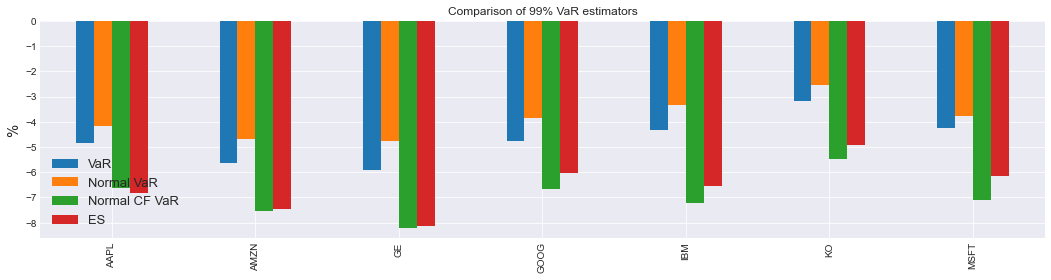

In [122]:
VaRs = pd.DataFrame({"VaR": ql.var(rets, CL=CL),
                     "Normal VaR": ql.var_normal(rets, CL=CL, cf=False),
                     "Normal CF VaR": ql.var_normal(rets, CL=CL, cf=True),
                     "ES": ql.es(rets, CL=CL)})

title = f"Comparison of {CL*100:.0f}% VaR estimators"
(VaRs * 100).plot.bar(figsize=(18,4), grid=True, title=title)
plt.ylabel("%", fontsize=15)
plt.legend(fontsize=13)
plt.show()

#### Summary statistics

In [124]:
ql.summary_stats(rets, CL=CL)

,AAPL,AMZN,GE,GOOG,IBM,KO,MSFT
(Ann.) Returns,0.237492,0.226191,-0.024856,0.165097,0.015860,0.089164,0.245821
(Ann.) Std,0.291064,0.325284,0.324477,0.267496,0.229157,0.177299,0.265326
Skewness,-0.072334,0.412764,0.166840,0.423256,-0.539957,-0.664707,0.034956
Kurtosis,8.487689,10.548673,10.819122,11.823880,13.250569,12.816791,11.632546
VaR 0.99,-0.048387,-0.056431,-0.059087,-0.047631,-0.043399,-0.031608,-0.042652
Normal VaR 0.99,-0.041640,-0.046651,-0.047442,-0.038453,-0.033415,-0.025581,-0.037870
Normal CF VaR 0.99,-0.066104,-0.075270,-0.082082,-0.066826,-0.072159,-0.054817,-0.071164
ES 0.99,-0.068166,-0.074504,-0.081151,-0.060446,-0.065567,-0.049247,-0.061645
Max Drawdown,-0.437972,-0.561453,-0.811914,-0.446018,-0.437200,-0.369875,-0.371485
Minimum,-0.128647,-0.140494,-0.151592,-0.111008,-0.128507,-0.096725,-0.147391


In [39]:
#rets.kurt()
#qt.kurtosis(rets, excess=True)

In [122]:
#qt.sample_cov(rets)
#qt.cc_cov(rets)
#qt.shrinkage_cov(rets, delta=0.3)